<a href="https://colab.research.google.com/github/Nsad9579/SP1NLP-SMS-Classification/blob/main/sms_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NLP and sms classification 

## importa data

In [ ]:
pip install kaggle

In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 29.2MB/s]


In [ ]:
! unzip sms-spam-collection-dataset

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


### impport datasets

In [ ]:
import pandas as pd

data= pd.read_csv('/content/spam.csv',  encoding='latin-1')

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
messages = [line.rstrip() for line in open('/content/spam.csv',encoding='latin-1')]

In [ ]:
for numb, message in enumerate(messages[:10]):
  print(numb, message)
  print('\n')

0 v1,v2,,,


1 ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,


2 ham,Ok lar... Joking wif u oni...,,,


3 spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,


4 ham,U dun say so early hor... U c already then say...,,,


5 ham,"Nah I don't think he goes to usf, he lives around here though",,,


6 spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,


7 ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,


8 ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,


9 spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize r

In [ ]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
data.head()
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [ ]:
data['length']=data['v2'].apply(len)
data.describe()

,length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


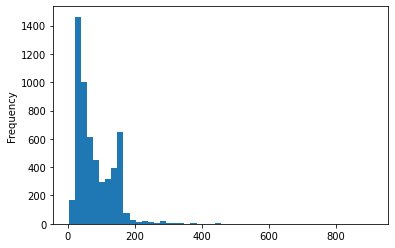

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data['length'].plot(bins=50,kind='hist')

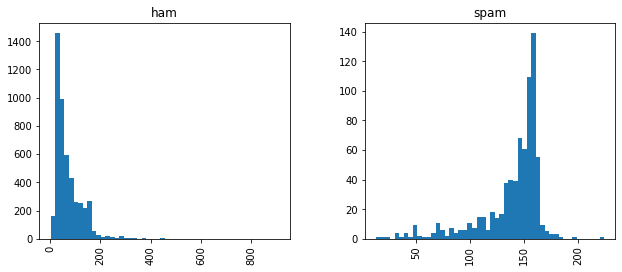

In [ ]:
data.hist(column='length', by='v1',bins=50,figsize=(10,4))
plt.show()

## preprocessing

###NO PUNCTUATION

In [ ]:
import string
from string import punctuation
def Nopunct():
  global punc_cleared_F
  punc_cleared_F=[]
  for sms in data['v2']:
    punc_cleared=[char for char in sms if char not in string.punctuation ] 
    punc_cleared= ''.join(punc_cleared)
    punc_cleared_F.append(punc_cleared)
  return punc_cleared_F



### step2 : clear stop words

In [ ]:
! pip install nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
NoStopwords_F=[]
NoStopwords=[]
word=""
for sentence in  punc_cleared_F:
  NoStopwords = [word for word in sentence.split() if word.lower() not in stopwords.words('english')]
  NoStopwords_F.append(NoStopwords)


NameError: ignored

### Step 1 & 2

In [ ]:
def text_process(mess):
  global punc_cleared_F
  punc_cleared_F=[]
  punc_cleared=[char for char in mess if char not in string.punctuation ] 
  punc_cleared= ''.join(punc_cleared)
  return [word for word in punc_cleared.split() if word.lower() not in stopwords.words('english')]

In [ ]:
data['v2'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: v2, dtype: object

### step 3 :CountVec

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(analyzer=text_process).fit(data['v2'])

In [ ]:
msg4= data['v2'][3]
print(msg4)

U dun say so early hor... U c already then say...


In [ ]:
bow4=bow.transform([msg4])
print(bow4.shape)

(1, 11304)


In [ ]:
print(bow4)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2


In [ ]:
print(bow.get_feature_names_out()[4073])
print(bow.get_feature_names_out()[9570])

VALUED
shades


In [ ]:
data_bow=bow.transform(data['v2'])

In [ ]:
print('Shape of Sparse Matrix: ', data_bow.shape)

Shape of Sparse Matrix:  (5572, 11304)


In [ ]:
print('none-zero occurrence amount: ', data_bow.nnz)

none-zero occurrence amount:  50193


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer=TfidfTransformer().fit(data_bow)

In [ ]:
tfidf4=tfidf_transformer.transform(bow4)

In [ ]:
print(tfidf4)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [ ]:
data_tfidf= tfidf_transformer.transform(data_bow)

In [ ]:
print(data_bow.shape)

(5572, 11304)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

spam_detector=MultinomialNB().fit(data_tfidf,data['v1'])

In [ ]:
print(spam_detector.predict(tfidf4[0]))
print(data['v1'][3])

['ham']
ham


In [ ]:
all_predictions=spam_detector.predict(data_tfidf)

print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(data['v1'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(data['v2'],data['v1'], test_size=0.2)

In [ ]:
x_test.shape

(1115,)

In [ ]:
from sklearn.pipeline import Pipeline 

pipeline_sms=Pipeline([('bow',CountVectorizer(analyzer=text_process)),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])